## Exploratory Data Analysis 

#### Prudential Life Insurance Assessment
Dataset : https://www.kaggle.com/c/prudential-life-insurance-assessment/data

In [70]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import VarianceThreshold
import seaborn as sns
%matplotlib inline 
import matplotlib
matplotlib.style.use('ggplot')

In [117]:
df = pd.read_csv('train_data.csv')

In [118]:
df.head()

Id  Product_Info_1 Product_Info_2  Product_Info_3  Product_Info_4  \
0   2               1             D3              10        0.076923   
1   5               1             A1              26        0.076923   
2   6               1             E1              26        0.076923   
3   7               1             D4              10        0.487179   
4   8               1             D2              26        0.230769   

   Product_Info_5  Product_Info_6  Product_Info_7   Ins_Age        Ht  \
0               2               1               1  0.641791  0.581818   
1               2               3               1  0.059701  0.600000   
2               2               3               1  0.029851  0.745455   
3               2               3               1  0.164179  0.672727   
4               2               3               1  0.417910  0.654545   

     ...     Medical_Keyword_40  Medical_Keyword_41  Medical_Keyword_42  \
0    ...                      0                   0                   0   
1    ...                      0                   0                   0   
2    ...                      0                   0                   0   
3    ...                      0                   0                   0   
4    ...                      0                   0                   0   

   Medical_Keyword_43  Medical_Keyword_44  Medical_Keyword_45  \
0                   0                   0                   0   
1                   0                   0                   0   
2                   0                   0                   0   
3                   0                   0                   0   
4                   0                   0                   0   

   Medical_Keyword_46  Medical_Keyword_47  Medical_Keyword_48  Response  
0                   0                   0                   0         8  
1                   0                   0                   0         4  
2                   0                   0                   0         8  
3                   0                   0                   0         8  
4                   0                   0                   0         8  

[5 rows x 128 columns]

In [ ]:
#df = df_train.append(df_test) # creating single dataframe of train and test data to perform data cleaning and EDA

### Handling Missing values

#### Statistical summary of the data 

In [119]:
df.describe()

Id  Product_Info_1  Product_Info_3  Product_Info_4  \
count  59381.000000    59381.000000    59381.000000    59381.000000   
mean   39507.211515        1.026355       24.415655        0.328952   
std    22815.883089        0.160191        5.072885        0.282562   
min        2.000000        1.000000        1.000000        0.000000   
25%    19780.000000        1.000000       26.000000        0.076923   
50%    39487.000000        1.000000       26.000000        0.230769   
75%    59211.000000        1.000000       26.000000        0.487179   
max    79146.000000        2.000000       38.000000        1.000000   

       Product_Info_5  Product_Info_6  Product_Info_7       Ins_Age  \
count    59381.000000    59381.000000    59381.000000  59381.000000   
mean         2.006955        2.673599        1.043583      0.405567   
std          0.083107        0.739103        0.291949      0.197190   
min          2.000000        1.000000        1.000000      0.000000   
25%          2.000000        3.000000        1.000000      0.238806   
50%          2.000000        3.000000        1.000000      0.402985   
75%          2.000000        3.000000        1.000000      0.567164   
max          3.000000        3.000000        3.000000      1.000000   

                 Ht            Wt      ...       Medical_Keyword_40  \
count  59381.000000  59381.000000      ...             59381.000000   
mean       0.707283      0.292587      ...                 0.056954   
std        0.074239      0.089037      ...                 0.231757   
min        0.000000      0.000000      ...                 0.000000   
25%        0.654545      0.225941      ...                 0.000000   
50%        0.709091      0.288703      ...                 0.000000   
75%        0.763636      0.345188      ...                 0.000000   
max        1.000000      1.000000      ...                 1.000000   

       Medical_Keyword_41  Medical_Keyword_42  Medical_Keyword_43  \
count        59381.000000        59381.000000        59381.000000   
mean             0.010054            0.045536            0.010710   
std              0.099764            0.208479            0.102937   
min              0.000000            0.000000            0.000000   
25%              0.000000            0.000000            0.000000   
50%              0.000000            0.000000            0.000000   
75%              0.000000            0.000000            0.000000   
max              1.000000            1.000000            1.000000   

       Medical_Keyword_44  Medical_Keyword_45  Medical_Keyword_46  \
count        59381.000000        59381.000000        59381.000000   
mean             0.007528            0.013691            0.008488   
std              0.086436            0.116207            0.091737   
min              0.000000            0.000000            0.000000   
25%              0.000000            0.000000            0.000000   
50%              0.000000            0.000000            0.000000   
75%              0.000000            0.000000            0.000000   
max              1.000000            1.000000            1.000000   

       Medical_Keyword_47  Medical_Keyword_48      Response  
count        59381.000000        59381.000000  59381.000000  
mean             0.019905            0.054496      5.636837  
std              0.139676            0.226995      2.456833  
min              0.000000            0.000000      1.000000  
25%              0.000000            0.000000      4.000000  
50%              0.000000            0.000000      6.000000  
75%              0.000000            0.000000      8.000000  
max              1.000000            1.000000      8.000000  

[8 rows x 127 columns]

#### Count nulls in all columns

In [120]:
df.isnull().sum()

Id                         0
Product_Info_1             0
Product_Info_2             0
Product_Info_3             0
Product_Info_4             0
Product_Info_5             0
Product_Info_6             0
Product_Info_7             0
Ins_Age                    0
Ht                         0
Wt                         0
BMI                        0
Employment_Info_1         19
Employment_Info_2          0
Employment_Info_3          0
Employment_Info_4       6779
Employment_Info_5          0
Employment_Info_6      10854
InsuredInfo_1              0
InsuredInfo_2              0
InsuredInfo_3              0
InsuredInfo_4              0
InsuredInfo_5              0
InsuredInfo_6              0
InsuredInfo_7              0
Insurance_History_1        0
Insurance_History_2        0
Insurance_History_3        0
Insurance_History_4        0
Insurance_History_5    25396
                       ...  
Medical_Keyword_20         0
Medical_Keyword_21         0
Medical_Keyword_22         0
Medical_Keywor

#### Percentage of missing values in features

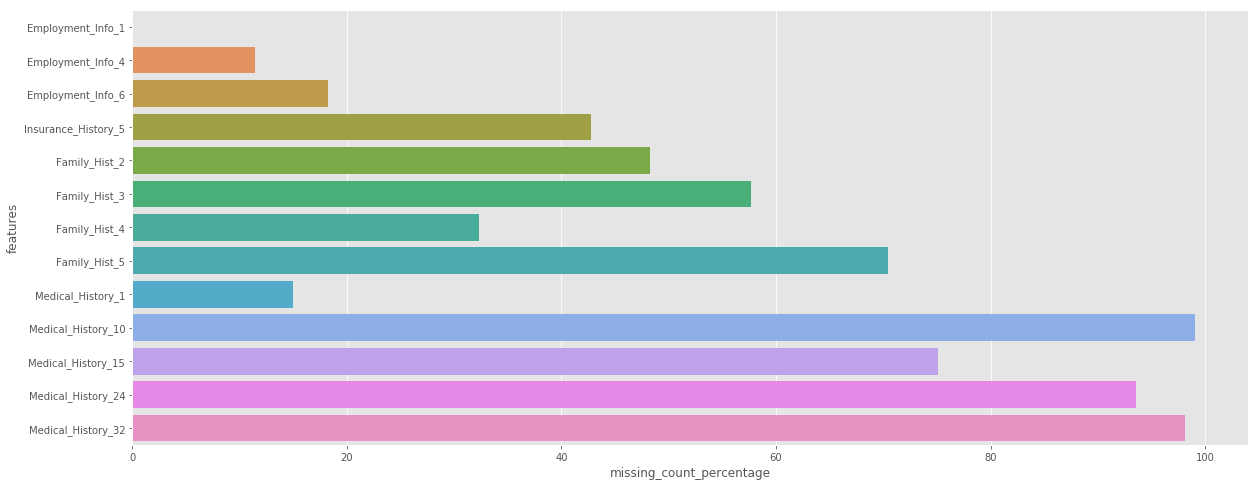

In [121]:
missing= df.isnull().sum()[df.isnull().sum() !=0]
missing=pd.DataFrame(missing.reset_index())
missing.rename(columns={'index':'features',0:'missing_count'},inplace=True)
missing['missing_count_percentage']=((missing['missing_count'])/len(df))*100
plt.figure(figsize=(20,8))
sns.barplot(y=missing['features'],x=missing['missing_count_percentage'])

In [122]:
missing

features  missing_count  missing_count_percentage
0     Employment_Info_1             19                  0.031997
1     Employment_Info_4           6779                 11.416110
2     Employment_Info_6          10854                 18.278574
3   Insurance_History_5          25396                 42.767889
4         Family_Hist_2          28656                 48.257860
5         Family_Hist_3          34241                 57.663226
6         Family_Hist_4          19184                 32.306630
7         Family_Hist_5          41811                 70.411411
8     Medical_History_1           8889                 14.969435
9    Medical_History_10          58824                 99.061990
10   Medical_History_15          44596                 75.101463
11   Medical_History_24          55580                 93.598963
12   Medical_History_32          58274                 98.135767

#### Removing columns with more the 50% null data 

In [123]:
missing[missing['missing_count_percentage']> 50]['features']

5          Family_Hist_3
7          Family_Hist_5
9     Medical_History_10
10    Medical_History_15
11    Medical_History_24
12    Medical_History_32
Name: features, dtype: object

In [124]:
for feature in missing[missing['missing_count_percentage']> 50]['features']:
    df.drop(feature,axis = 1, inplace = True) 

#### Plot distribution of null columns to determine whether to replace with mean or median 

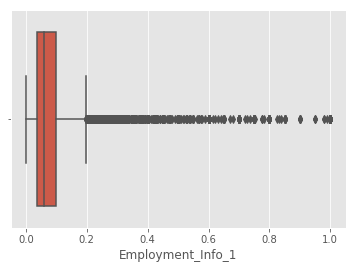

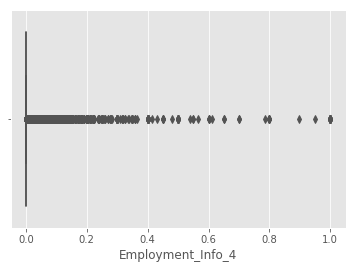

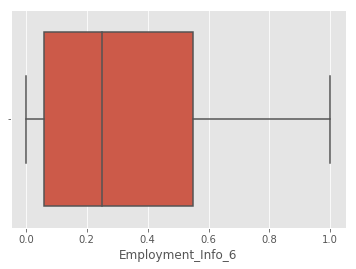

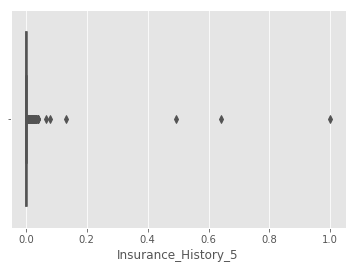

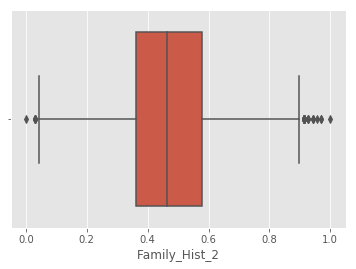

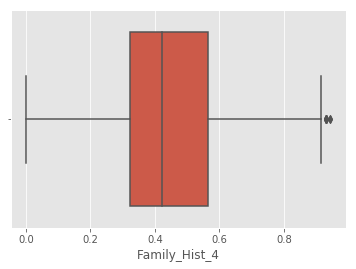

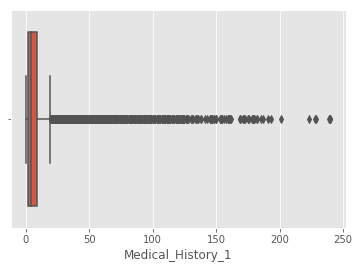

In [125]:
for feature in missing[missing['missing_count_percentage']<= 50]['features']:
    plt.figure()
    plt.plot(figsize=(15,10))
    sns.boxplot(df[feature])

#### Replacing null values with median as there are lot of outliers 

In [126]:
# not replacing nulls in variable Response as the records with Response as Null is test data
for feature in missing[missing['missing_count_percentage']<= 50]['features']:
    if feature != 'Response':
        df[feature].fillna(df[feature].median(),inplace=True)  

In [127]:
df.isnull().sum()

Id                     0
Product_Info_1         0
Product_Info_2         0
Product_Info_3         0
Product_Info_4         0
Product_Info_5         0
Product_Info_6         0
Product_Info_7         0
Ins_Age                0
Ht                     0
Wt                     0
BMI                    0
Employment_Info_1      0
Employment_Info_2      0
Employment_Info_3      0
Employment_Info_4      0
Employment_Info_5      0
Employment_Info_6      0
InsuredInfo_1          0
InsuredInfo_2          0
InsuredInfo_3          0
InsuredInfo_4          0
InsuredInfo_5          0
InsuredInfo_6          0
InsuredInfo_7          0
Insurance_History_1    0
Insurance_History_2    0
Insurance_History_3    0
Insurance_History_4    0
Insurance_History_5    0
                      ..
Medical_Keyword_20     0
Medical_Keyword_21     0
Medical_Keyword_22     0
Medical_Keyword_23     0
Medical_Keyword_24     0
Medical_Keyword_25     0
Medical_Keyword_26     0
Medical_Keyword_27     0
Medical_Keyword_28     0


### Formatting the data 

#### Check for inapproraite data types

In [128]:
df.dtypes

Id                       int64
Product_Info_1           int64
Product_Info_2          object
Product_Info_3           int64
Product_Info_4         float64
Product_Info_5           int64
Product_Info_6           int64
Product_Info_7           int64
Ins_Age                float64
Ht                     float64
Wt                     float64
BMI                    float64
Employment_Info_1      float64
Employment_Info_2        int64
Employment_Info_3        int64
Employment_Info_4      float64
Employment_Info_5        int64
Employment_Info_6      float64
InsuredInfo_1            int64
InsuredInfo_2            int64
InsuredInfo_3            int64
InsuredInfo_4            int64
InsuredInfo_5            int64
InsuredInfo_6            int64
InsuredInfo_7            int64
Insurance_History_1      int64
Insurance_History_2      int64
Insurance_History_3      int64
Insurance_History_4      int64
Insurance_History_5    float64
                        ...   
Medical_Keyword_20       int64
Medical_

### Distribution of data

C:\Users\jaina\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


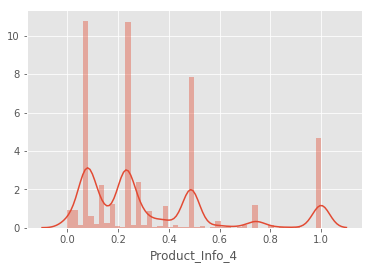

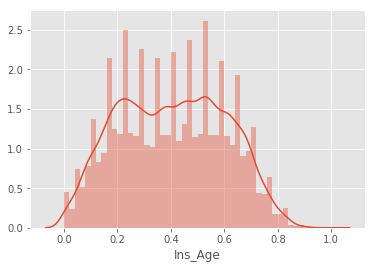

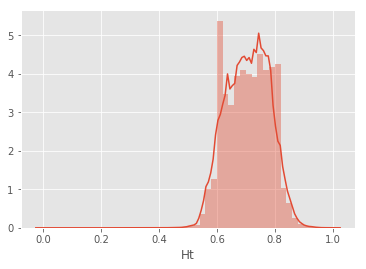

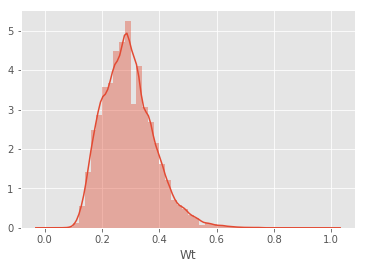

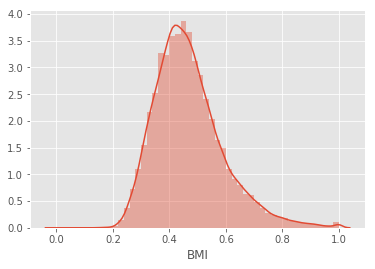

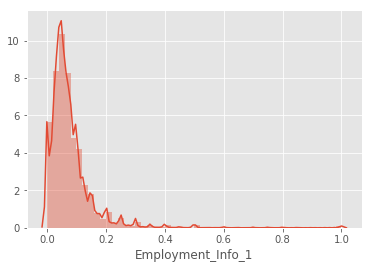

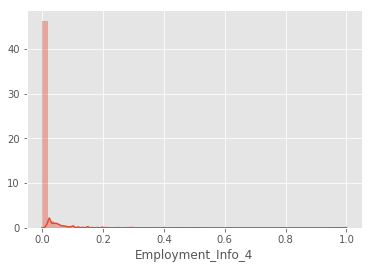

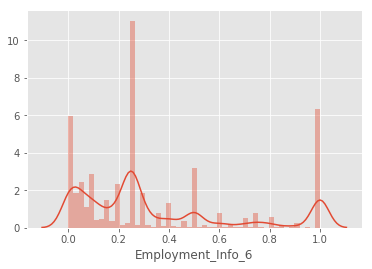

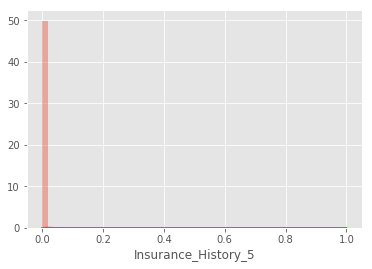

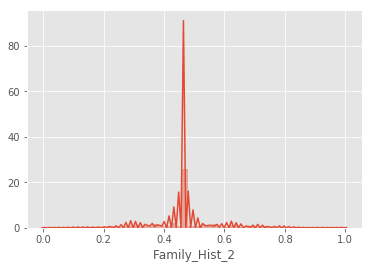

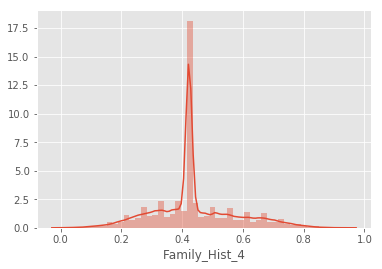

In [129]:
cont_columns = ['Product_Info_4', 'Ins_Age', 'Ht', 'Wt', 'BMI', 'Employment_Info_1', 
                'Employment_Info_4', 'Employment_Info_6', 'Insurance_History_5', 'Family_Hist_2', 'Family_Hist_4']
for column in cont_columns:
    if column != 'Response':
        plt.figure()
        plt.plot(figsize=(15,10))
        sns.distplot(df[column])

### Statistical summary of the clean data

In [133]:
df.describe()

Id  Product_Info_1  Product_Info_3  Product_Info_4  \
count  59381.000000    59381.000000    59381.000000    59381.000000   
mean   39507.211515        1.026355       24.415655        0.328952   
std    22815.883089        0.160191        5.072885        0.282562   
min        2.000000        1.000000        1.000000        0.000000   
25%    19780.000000        1.000000       26.000000        0.076923   
50%    39487.000000        1.000000       26.000000        0.230769   
75%    59211.000000        1.000000       26.000000        0.487179   
max    79146.000000        2.000000       38.000000        1.000000   

       Product_Info_5  Product_Info_6  Product_Info_7       Ins_Age  \
count    59381.000000    59381.000000    59381.000000  59381.000000   
mean         2.006955        2.673599        1.043583      0.405567   
std          0.083107        0.739103        0.291949      0.197190   
min          2.000000        1.000000        1.000000      0.000000   
25%          2.000000        3.000000        1.000000      0.238806   
50%          2.000000        3.000000        1.000000      0.402985   
75%          2.000000        3.000000        1.000000      0.567164   
max          3.000000        3.000000        3.000000      1.000000   

                 Ht           BMI      ...       Medical_Keyword_40  \
count  59381.000000  59381.000000      ...             59381.000000   
mean       0.707283      0.469462      ...                 0.056954   
std        0.074239      0.122213      ...                 0.231757   
min        0.000000      0.000000      ...                 0.000000   
25%        0.654545      0.385517      ...                 0.000000   
50%        0.709091      0.451349      ...                 0.000000   
75%        0.763636      0.532858      ...                 0.000000   
max        1.000000      1.000000      ...                 1.000000   

       Medical_Keyword_41  Medical_Keyword_42  Medical_Keyword_43  \
count        59381.000000        59381.000000        59381.000000   
mean             0.010054            0.045536            0.010710   
std              0.099764            0.208479            0.102937   
min              0.000000            0.000000            0.000000   
25%              0.000000            0.000000            0.000000   
50%              0.000000            0.000000            0.000000   
75%              0.000000            0.000000            0.000000   
max              1.000000            1.000000            1.000000   

       Medical_Keyword_44  Medical_Keyword_45  Medical_Keyword_46  \
count        59381.000000        59381.000000        59381.000000   
mean             0.007528            0.013691            0.008488   
std              0.086436            0.116207            0.091737   
min              0.000000            0.000000            0.000000   
25%              0.000000            0.000000            0.000000   
50%              0.000000            0.000000            0.000000   
75%              0.000000            0.000000            0.000000   
max              1.000000            1.000000            1.000000   

       Medical_Keyword_47  Medical_Keyword_48      Response  
count        59381.000000        59381.000000  59381.000000  
mean             0.019905            0.054496      5.636837  
std              0.139676            0.226995      2.456833  
min              0.000000            0.000000      1.000000  
25%              0.000000            0.000000      4.000000  
50%              0.000000            0.000000      6.000000  
75%              0.000000            0.000000      8.000000  
max              1.000000            1.000000      8.000000  

[8 rows x 115 columns]

In [80]:
#med_keyword_columns = df.columns[df.columns.str.startswith('Medical_Keyword_')]
#df['Med_Keywords_Count'] = df[med_keyword_columns].sum(axis=1)

In [148]:
#df[df['Med_Keywords_Count']==1]['Response']

### Analysis

#### Age Group with most applications

In [134]:
df_1 = df[['Ins_Age', 'Product_Info_2', 'Response']]

In [135]:
df_1['Ins_Age'] = df_1['Ins_Age'].round(2)

C:\Users\jaina\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [136]:
df_1.head()

Ins_Age Product_Info_2  Response
0     0.64             D3         8
1     0.06             A1         4
2     0.03             E1         8
3     0.16             D4         8
4     0.42             D2         8

In [137]:
labels = ['0-.09', '.1-.19', '.20-.29', '.30-.39', '.40-.49', '.50-.59', '.60-.69', '.70-.79','.80-.89','.90-1']
df_1['age_group'] = pd.cut(df_1.Ins_Age, bins = len(labels), right=False, labels=labels)
df_1[['Ins_Age', 'age_group']].drop_duplicates()[:10]

C:\Users\jaina\Anaconda3\lib\site-packages\ipykernel\__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


Ins_Age age_group
0     0.64   .60-.69
1     0.06     0-.09
2     0.03     0-.09
3     0.16    .1-.19
4     0.42   .40-.49
5     0.51   .50-.59
6     0.37   .30-.39
7     0.61   .60-.69
8     0.52   .50-.59
9     0.55   .50-.59

In [138]:
df_1.head()

Ins_Age Product_Info_2  Response age_group
0     0.64             D3         8   .60-.69
1     0.06             A1         4     0-.09
2     0.03             E1         8     0-.09
3     0.16             D4         8    .1-.19
4     0.42             D2         8   .40-.49

In [139]:
df_output = df_1.groupby(['age_group'])['Response'].count()
df_output = df_output.reset_index()
df_output.columns = ['age_group', 'Total_Applications']
df_output.head()

age_group  Total_Applications
0     0-.09                3225
1    .1-.19                7765
2   .20-.29                9844
3   .30-.39                7796
4   .40-.49                9664

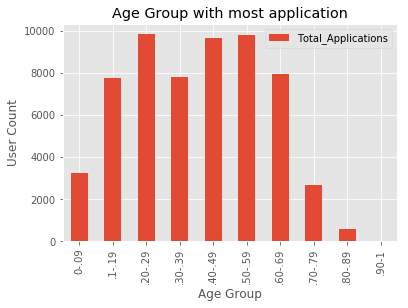

In [140]:
ax = df_output.plot.bar(x='age_group', y=['Total_Applications'] , title='Age Group with most application')
ax.set_xlabel('Age Group')
ax.set_ylabel('User Count')
plt.show()

#### Most favourable Product 

In [141]:
df_output = df_1.groupby(['Product_Info_2'])['Response'].count()
df_output = df_output.reset_index()
df_output.columns = ['Product_Info_2', 'Total_Applications']
df_output.head()

Product_Info_2  Total_Applications
0             A1                2363
1             A2                1974
2             A3                 977
3             A4                 210
4             A5                 775

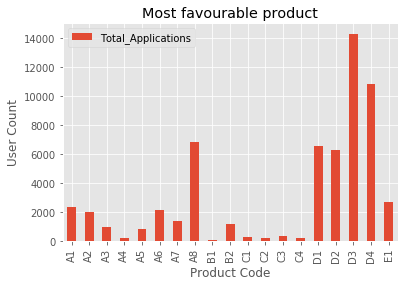

In [142]:
ax = df_output.plot.bar(x='Product_Info_2', y=['Total_Applications'] , title='Most favourable product')
ax.set_xlabel('Product Code')
ax.set_ylabel('User Count')
plt.show()

In [143]:
df_output = df_1.groupby(['age_group','Product_Info_2']).count()
#df_output = df_output.reset_index()
#df_output.columns = ['age_group', 'Avg_Response']
df_output.head()

Ins_Age  Response
age_group Product_Info_2                   
0-.09     A1                586.0     586.0
          A2                 52.0      52.0
          A3                115.0     115.0
          A4                 24.0      24.0
          A5                 42.0      42.0

In [144]:
g = df_output['Response'].groupby(level=0, group_keys=False) # group by the first level of index
#res = g.apply(lambda x: x.order(ascending=False)) # sort within each group in descending order 
res = g.apply(lambda x: x.sort_values(ascending=False))
res = pd.DataFrame(res) #convert series to dataframe 
res.head()

Response
age_group Product_Info_2          
0-.09     D4                 714.0
          A1                 586.0
          D3                 372.0
          E1                 287.0
          A8                 264.0

In [145]:
res = res.reset_index()
res = res.groupby(['age_group']).first()
res = res.rename(columns={'Response':'Total Users'})
res = res.reset_index()
res

age_group Product_Info_2  Total Users
0     0-.09             D4        714.0
1    .1-.19             D4       2727.0
2   .20-.29             D4       3770.0
3   .30-.39             D3       2588.0
4   .40-.49             D3       3166.0
5   .50-.59             D3       3010.0
6   .60-.69             D1       1714.0
7   .70-.79             A8        758.0
8   .80-.89             A8        205.0
9     .90-1             A8         21.0

In [146]:
Product_Code = res['Product_Info_2']

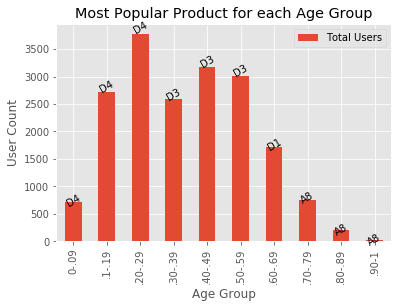

In [147]:
ax = res.plot.bar(x='age_group', y=['Total Users'] , title='Most Popular Product for each Age Group')
ax.set_xlabel('Age Group')
ax.set_ylabel('User Count')
i = 0
for p in ax.patches:
    height = p.get_height()
    ax.annotate(Product_Code[i] , xy=((p.get_x()), (p.get_height()*1.03)), rotation=30)
    i = i +1
#plt.savefig(output_path + '\\age_group_genre.jpeg')
plt.show()

In [149]:
df_2 = df[['BMI','Response']]

In [151]:
df_2 = df_2.sort_values(by=['BMI'])
df_2.head()

BMI  Response
14351  0.000000         8
41285  0.058838         5
1710   0.130238         8
40015  0.151567         5
53218  0.157533         1

In [158]:
#import seaborn as sns; sns.set(style="ticks", color_codes=True)
#g = sns.pairplot(df_1)

### Feature Selection

#### Converting categorical feature to numeric 

In [ ]:
le=LabelEncoder()
df['Product_Info_2']=le.fit_transform(df['Product_Info_2'])

#### Removing the highly correlated features 

In [130]:
corr = df.corr()

In [131]:
cmap = cmap=sns.diverging_palette(5, 250, as_cmap=True)

# def magnify():
#     return [dict(selector="th",
#                  props=[("font-size", "7pt")]),
#             dict(selector="td",
#                  props=[('padding', "0em 0em")]),
#             dict(selector="th:hover",
#                  props=[("font-size", "12pt")]),
#             dict(selector="tr:hover td:hover",
#                  props=[('max-width', '200px'),
#                         ('font-size', '12pt')])
# ]

corr.style.background_gradient(cmap, axis=1)\
    .set_properties(**{'max-width': '80px', 'font-size': '10pt'})\
    .set_precision(2)
#     .set_table_styles(magnify())

# sns.heatmap(corr, 
#         xticklabels=corr.columns,
#         yticklabels=corr.columns)

From the above matrix , we identify the highly correlated variables  
1) BMI and Wt  
2) Insurance Ht_1 and Insurance Ht_8  
3) Insurance Ht_4 and Insurance Ht_7, Insurance Ht_9   
4) Medical_history_19 and Medical_Keyword_30  
5) Medical_History_36 and Medical_history_25  

In [132]:
df.drop(['Wt','Insurance_History_8','Insurance_History_7','Insurance_History_9','Medical_Keyword_30','Medical_History_25'],axis = 1, inplace = True) 

#### Removing features which have close to zero variance 

In [20]:
df1 = df.drop('Response',axis = 1)  # creating a new dataframe without target variable 

In [21]:
constant_filter = VarianceThreshold(threshold=0.01)  
constant_filter.fit(df1)  
len(df1.columns[constant_filter.get_support()])  

90

##### constant columns

In [22]:
constant_columns = [column for column in df1.columns  
                    if column not in df1.columns[constant_filter.get_support()]]

print(len(constant_columns)) 
for column in constant_columns:  
    df.drop(column,axis = 1, inplace = True) 

25


In [23]:
df.shape

(59381, 91)

#### Removing columns that dont effect eligibility score like 'ID'

In [24]:
df.drop('Id',axis = 1, inplace = True) 